# MACHINE LEARNING PROJECT

## 1. IMPORT LIBRARIES, TOOLS, AND DATASETS

### 1.1. Import Libraries and tools

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


### 1.2. Load and view Training and Testing Dataset

In [2]:
#loading the UNSV train and test dataset into jupyter notebook
train = pd.read_csv('C:/Users/USER/Desktop/DATASETS_AI/UNSW_NB15_training-set.csv')
test = pd.read_csv('C:/Users/USER/Desktop/DATASETS_AI/UNSW_NB15_testing-set.csv')

In [3]:
#DISPLAY THE NUMBER OF ROWS AND COLUMNS ON THE DATASET AND FIRST 5 ROWS
print(train.shape)
train.head()

(175341, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


## 2. PERFORM SIMPLE EXPLORATORY DATA ANALYSIS OF UNSW DATA FRAME

### 2.1. Understanding the UNSW Dataset

In [4]:
#view the dataset general information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [5]:
#BASIC DESCRIPTIVE STATISTICS OF THE DATASET
train.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


Text(0, 0.5, 'Frequency')

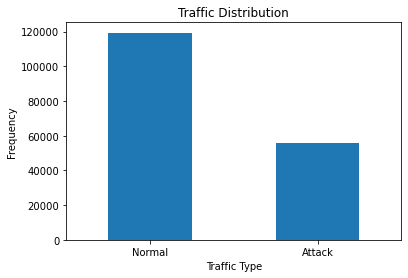

In [6]:
#Examine the distribution of attack and normal traffic on our train dataset

LABELS = ["Normal", "Attack"]

count_classes = pd.value_counts(train['label'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Traffic Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Traffic Type")

plt.ylabel("Frequency")


In [7]:
#Drop 'attack_cat' column
train.drop(['attack_cat'], axis=1, inplace=True)
test.drop(['attack_cat'], axis=1, inplace=True)

In [8]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,1,0,0,0,1,1,0,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,1,2,0,0,0,1,6,0,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,1,3,0,0,0,2,6,0,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,1,3,1,1,0,2,1,0,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,2,1,40,0,0,0,2,39,0,0


### 2.2. VISUALIZATIONS

#### 2.2.1. Frequency of Categories of output variable using Count plot

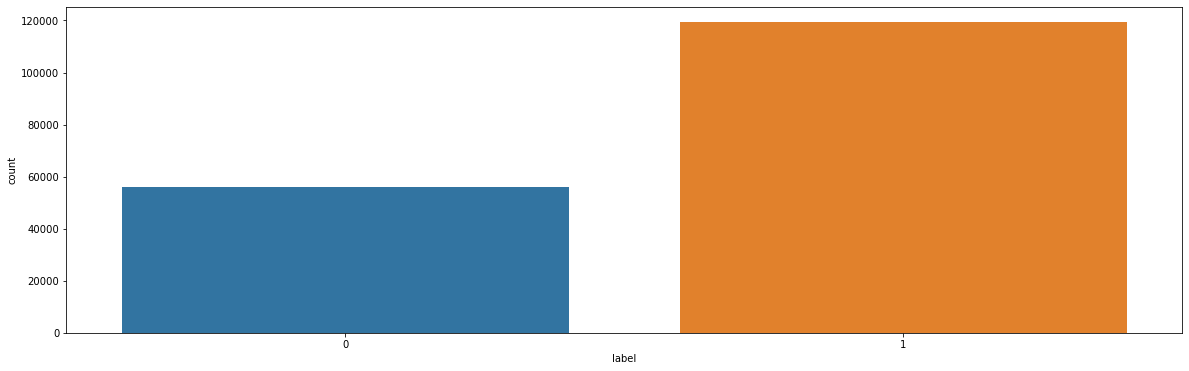

In [9]:
#Frequency of different categories of attacks
plt.figure(figsize=(20,6))
sns.countplot(x='label', data = train)
plt.show()

#### 2.2.2. Spreads of Output/Target Variable using Violin plot

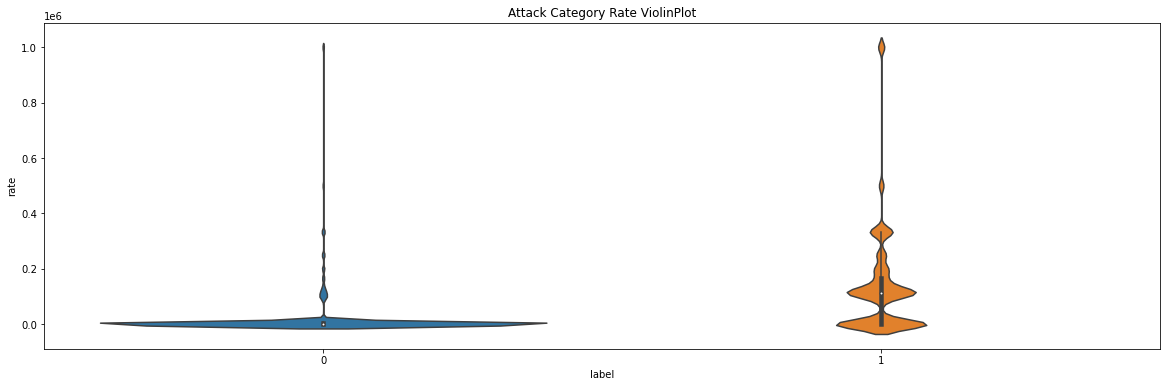

In [10]:
#Attack categories spread with respect to rate variable
plt.figure(figsize=(20,6))
sns.violinplot(x='label', y='rate', data= train).set_title('Attack Category Rate ViolinPlot')
plt.show()

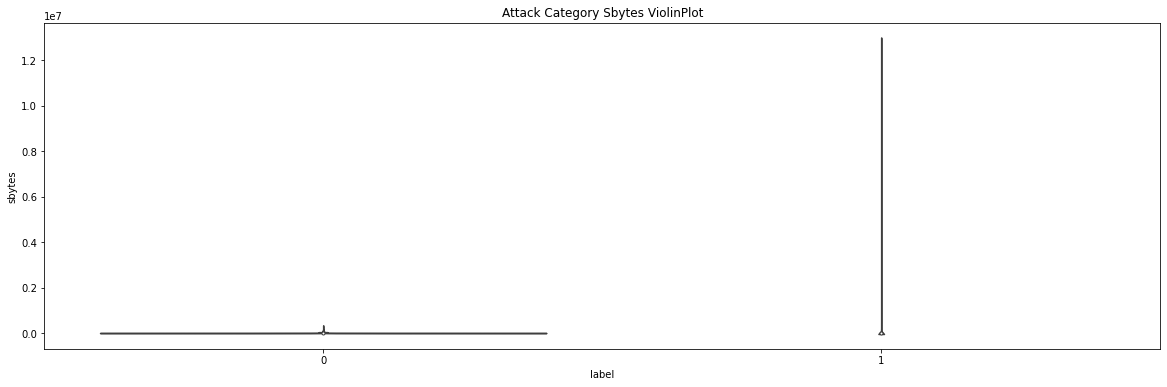

In [11]:
#Attack Sub categories spread with respect to sbytes variable
plt.figure(figsize=(20,6))
sns.violinplot(x='label', y='sbytes', data= train).set_title('Attack Category Sbytes ViolinPlot')
plt.show()

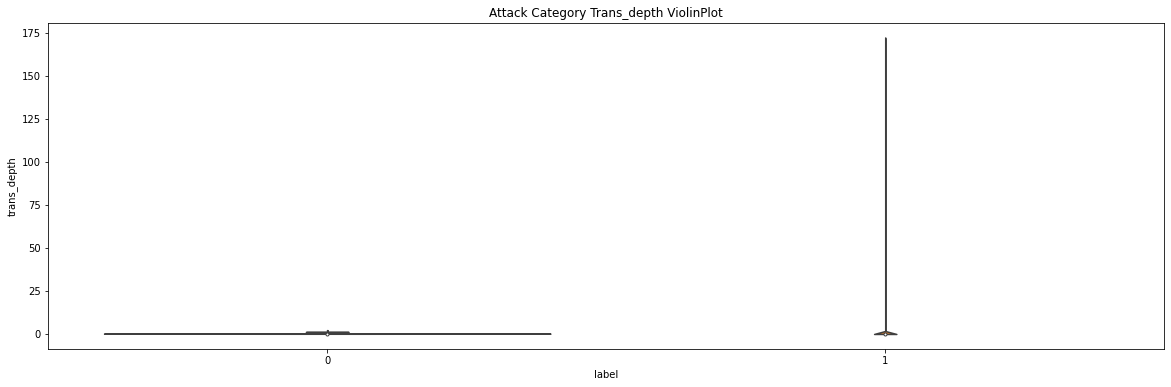

In [12]:
#Attack Sub categories spread with respect to trans_depth variable
plt.figure(figsize=(20,6))
sns.violinplot(x='label', y='trans_depth', data= train).set_title('Attack Category Trans_depth ViolinPlot')
plt.show()

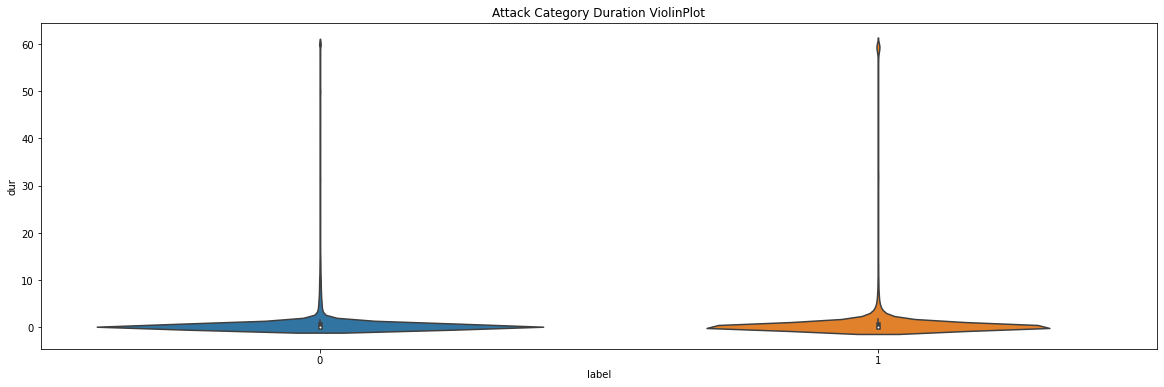

In [13]:
#Attack Sub categories spread with respect to duration variable
plt.figure(figsize=(20,6))
sns.violinplot(x='label', y='dur', data= train).set_title('Attack Category Duration ViolinPlot')
plt.show()

In [14]:
#PERFORM SIMPLE EXPLORATORY DATA ANALYSIS USING PANDAS PROFILING
profile = ProfileReport(train, title = 'Profile Report for Training Dataset', html= { 'style' : {'full_width':True}})

## 3. DATA PRE PROCESSING/CLEANING

### 3.1. View missing values and Datatypes

In [15]:
#CHECK FOR MISSING VALUES IN THE COLUMNS/FEATURES OF THE TRAIN DATASET
train.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
label      

In [16]:
#SHOW THE DATATYPE OF EACH VARIABLE IN THE DATA FRAME
train.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [17]:
#DISPLAY ONLY CATEGORICAL DATA (OBJECT DATATYPES)
train.select_dtypes(include = ['object'])

,proto,service,state
0,tcp,-,FIN
1,tcp,-,FIN
2,tcp,-,FIN
3,tcp,ftp,FIN
4,tcp,-,FIN
...,...,...,...
175336,udp,dns,INT
175337,tcp,-,FIN
175338,udp,dns,INT
175339,udp,dns,INT


In [18]:
#remove 'id' column from both train & test datasets
train.drop(['id'], axis=1, inplace=True)
test.drop(['id'], axis=1, inplace=True)

### 3.2. SCALING NUMERICAL ATTRIBUTES

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

# separate target column from numerical data 
sc_traindf = sc_traindf.drop(['label'], axis=1)

sc_testdf = sc_testdf.drop(['label'], axis=1)

### 3.3. ENCODING CATEGORICAL ATTRIBUTES

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = train.select_dtypes(include=['object']).copy()
cattest = test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)



### 3.4. ASSIGN INPUT AND OUTPUT DATAFRAMES

In [21]:
train_x = pd.concat([sc_traindf,traincat],axis=1)
train_y = train['label']
train_x.shape

(175341, 42)

In [22]:
test_x = pd.concat([sc_testdf,testcat],axis=1)
test_y = test['label']
test_x.shape

(82332, 42)

### 3.5. FEATURE SELECTION

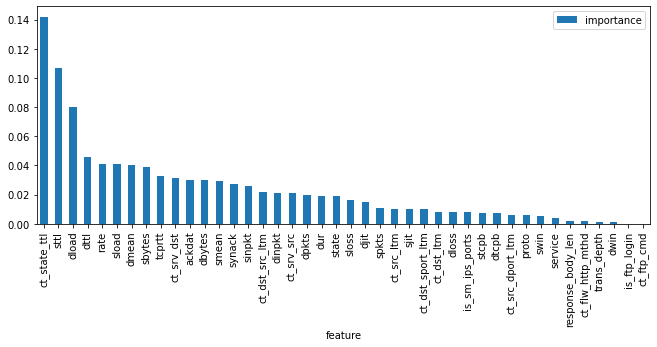

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [24]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 38 attributes
rfe = RFE(rfc, n_features_to_select=38)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'proto',
 'service',
 'state']

## 4. DATASET PARTITIONING/SPLITTING

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)

## 5. FITTING MODELS

In [26]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## 6. TEST MODELS/ MAKE OUTPUT PREDICTIONS 

In [27]:
pred_knn = KNN_Classifier.predict(X_test)
pred_NB = BNB_Classifier.predict(X_test)
pred_log = LGR_Classifier.predict(X_test)
pred_dt = DTC_Classifier.predict(X_test)

In [28]:
# KNeighborsClassifier Model Output Prediction
pred_knn

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
# Gaussian Naive Baye Model Output Prediction
pred_NB

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [30]:
# LogisticRegression Model Output Prediction
pred_log

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [31]:
# Decision Tree Model Output Prediction
pred_dt

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

## 7. PERFORMANCE EVALUATION

In [32]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print()
print('============================== KNeighborsClassifier Model Evaluation ==============================')
print()

print('KNeighborsClassifier Model Accuracy score: ', accuracy_score(Y_test, pred_knn))

print()

print('Confusion Matrix:')

print(confusion_matrix(Y_test, pred_knn))

print()

print('Classification Report:')

print(classification_report(Y_test, pred_knn))

print()
print('============================== Gaussian Naive Baye Model Evaluation ==============================')
print()

print('Gaussian Naive Baye Model Accuracy score: ', accuracy_score(Y_test, pred_NB))

print()

print('Confusion Matrix:')

print(confusion_matrix(Y_test, pred_NB))

print()

print('Classification Report:')
    
print(classification_report(Y_test, pred_NB))

print()
print('============================== LogisticRegression Model Evaluation ==============================')
print()

print('LogisticRegression Model Accuracy score: ', accuracy_score(Y_test, pred_log))

print()

print('Confusion Matrix:')

print(confusion_matrix(Y_test, pred_log))

print()

print('Classification Report:')
    
print(classification_report(Y_test, pred_log))


print()
print('============================== Decision Tree Model Evaluation ==============================')
print()

print('Decision Tree Model Accuracy score: ', accuracy_score(Y_test, pred_dt))

print()

print('Confusion Matrix:')

print(confusion_matrix(Y_test, pred_dt))

print()

print('Classification Report:')
    
print(classification_report(Y_test, pred_dt))


============================== KNeighborsClassifier Model Evaluation ==============================

KNeighborsClassifier Model Accuracy score:  0.9379503070167101

Confusion Matrix:
[[14749  1996]
 [ 1268 34590]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     16745
           1       0.95      0.96      0.95     35858

    accuracy                           0.94     52603
   macro avg       0.93      0.92      0.93     52603
weighted avg       0.94      0.94      0.94     52603


============================== Gaussian Naive Baye Model Evaluation ==============================

Gaussian Naive Baye Model Accuracy score:  0.8094405262057297

Confusion Matrix:
[[14011  2734]
 [ 7290 28568]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.84      0.74     16745
           1       0.91      0.80      0.85     35858

    accuracy                     